In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ellipsoid_method import EllipsoidMethod
from utils.utils import weights_init_uniform, change_format, prepare_data, train
from sklearn.model_selection import train_test_split
from utils.plot import plot_results
from model import LogReg
import torch
import torch.nn as nn

## Data

In [2]:
# Uncomment, if you need data
# !wget https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/covtype.libsvm.binary.scale.bz2
# !bunzip2 /content/covtype.libsvm.binary.scale.bz2

In [3]:
A, y, m, n = prepare_data("covtype.libsvm.binary.scale")
X, y = change_format(A, y, m)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Experiments



### Batch size = 8192

In [4]:
ITTER_NUM = 2000
LR = 0.01
BATCH_SIZE = 8192
BATCH_SIZE_SGD = 16

Q = torch.ones(X.shape[1], 2) * 1
Q[:, 0] *= -1

In [5]:
model = LogReg(X.shape[1], 1)
model.apply(weights_init_uniform)
loss_fn = nn.BCELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=LR)
losses_sgd_with_small_batch_size, accuracies_sgd_with_small_batch_size = train(model, loss_fn, optimizer, ITTER_NUM, X_train, y_train, X_test, y_test, BATCH_SIZE_SGD)

In [6]:
model = LogReg(X.shape[1], 1)
model.apply(weights_init_uniform)
loss_fn = nn.BCELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=LR)
losses_sgd, accuracies_sgd = train(model, loss_fn, optimizer, ITTER_NUM, X_train, y_train, X_test, y_test, BATCH_SIZE)

In [7]:
model = LogReg(X.shape[1], 1)
model.apply(weights_init_uniform)
loss_fn = nn.BCELoss()

optimizer = EllipsoidMethod(model.parameters(), Q)
losses_ell, accuracies_ell = train(model, loss_fn, optimizer, ITTER_NUM, X_train, y_train, X_test, y_test, batch_sz=BATCH_SIZE)

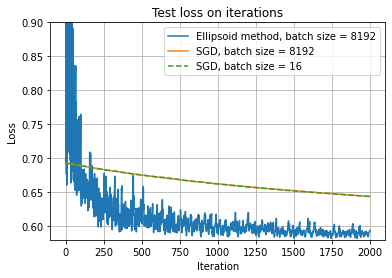

In [8]:
plot_results(losses_sgd_with_small_batch_size, losses_ell, losses_sgd, BATCH_SIZE, BATCH_SIZE_SGD, 0.9)

In [ ]:
с  